In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset (Iris dataset for this example)
data = load_iris()
X = data.data
y = data.target

In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

In [7]:
df = pd.DataFrame(X, columns=data['feature_names'])
df['target'] = y

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

In [12]:
X = data.data
y = data.target

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train[:10]

array([[ 0.61303014,  0.10850105,  0.94751783,  0.736072  ],
       [-0.56776627, -0.12400121,  0.38491447,  0.34752959],
       [-0.80392556,  1.03851009, -1.30289562, -1.33615415],
       [ 0.25879121, -0.12400121,  0.60995581,  0.736072  ],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25412853],
       [-0.80392556, -0.82150798,  0.04735245,  0.21801546],
       [-0.21352735,  1.73601687, -1.19037495, -1.20664002],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47704373],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34752959],
       [-0.09544771, -1.05401024,  0.10361279, -0.04101281]])

In [16]:
X_test[:10]

array([[-0.09544771, -0.58900572,  0.72247648,  1.5131568 ],
       [ 0.14071157, -1.98401928,  0.10361279, -0.30004108],
       [-0.44968663,  2.66602591, -1.35915595, -1.33615415],
       [ 1.6757469 , -0.35650346,  1.39760052,  0.736072  ],
       [-1.04008484,  0.80600783, -1.30289562, -1.33615415],
       [ 0.49495049,  0.57350557,  1.22881951,  1.64267094],
       [-1.04008484,  1.03851009, -1.41541629, -1.20664002],
       [ 0.96726906,  0.10850105,  0.49743514,  0.34752959],
       [ 1.0853487 , -0.58900572,  0.55369548,  0.21801546],
       [ 0.25879121, -0.58900572,  0.10361279,  0.08850133]])

In [17]:
# prompt: one-hot encoding y_train and y_test
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# Fit and transform the training data
y_train_encoded = enc.fit_transform(y_train.reshape(-1,1)).toarray()
# Transform the testing data
y_test_encoded = enc.transform(y_test.reshape(-1,1)).toarray()

In [18]:
y_train_encoded[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [19]:
y_test_encoded[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [21]:
# Evaluation: Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



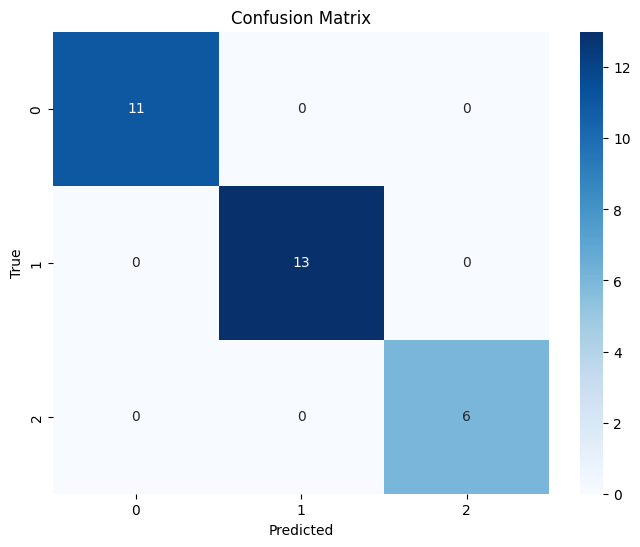

In [22]:
cm = confusion_matrix(y_test, y_pred) # Assuming y_test and y_pred are defined
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#prediction
X_new = np.array([[5.1, 3.5, 1.4, 0.2]]) # Example new data point
y_pred_new = knn.predict(X_new)
print(f"Predicted class for new data point: {y_pred_new[0]}")

Predicted class for new data point: 2


In [24]:
# For multiple predictions:
X_new_multiple = np.array([[5.1, 3.5, 1.4, 0.2], [6.2, 2.9, 4.3, 1.3]])
y_pred_multiple = knn.predict(X_new_multiple)
print(f"Predicted classes for multiple data points: {y_pred_multiple}")

Predicted classes for multiple data points: [2 2]
